In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
events_data = pd.read_csv('./data/event_data_train.csv')

In [4]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [6]:
submissions_data = pd.read_csv('./data/submissions_data_train.csv')

In [7]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [8]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [9]:
submissions_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date

In [10]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15


In [11]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [12]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [13]:
events_data['day'] = events_data.date.dt.date

In [14]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


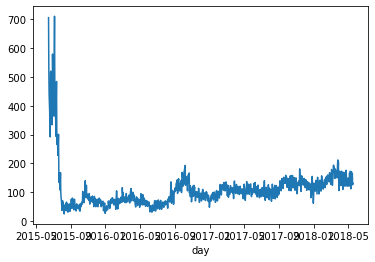

In [15]:
events_data.groupby('day') \
  .user_id.nunique().plot()

In [16]:
sns.set(rc={'figure.figsize': (9,6)})

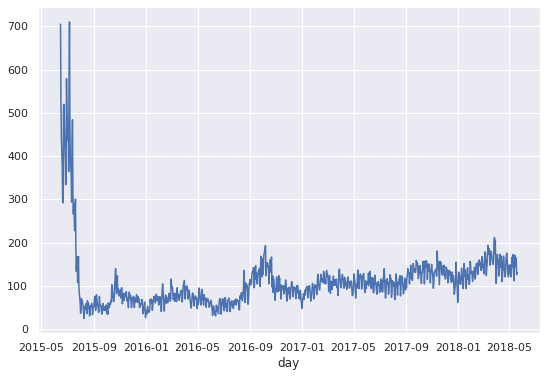

In [17]:
events_data.groupby('day') \
  .user_id.nunique().plot()

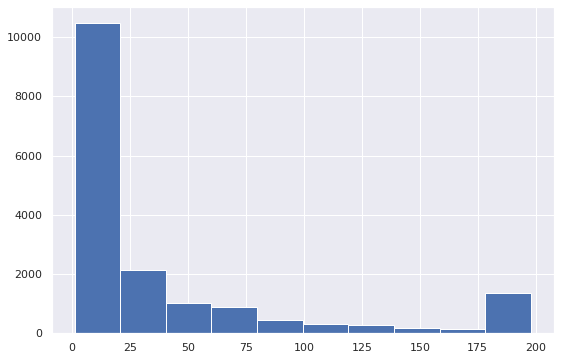

In [18]:
events_data[events_data.action == 'passed'] \
  .groupby('user_id', as_index = False) \
  .agg({'step_id' : 'count'}) \
  .rename(columns={'step_id': 'passed_steps'}).passed_steps.hist()

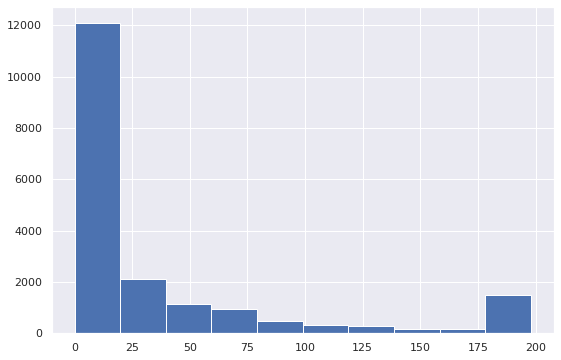

In [19]:
events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id', 
                        aggfunc='count',
                        fill_value=0).reset_index().discovered.hist()#head()

In [20]:
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id', 
                        aggfunc='count',
                        fill_value=0).reset_index()

In [21]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [22]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [23]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [24]:
gap_data = gap_data / (24*60*60)

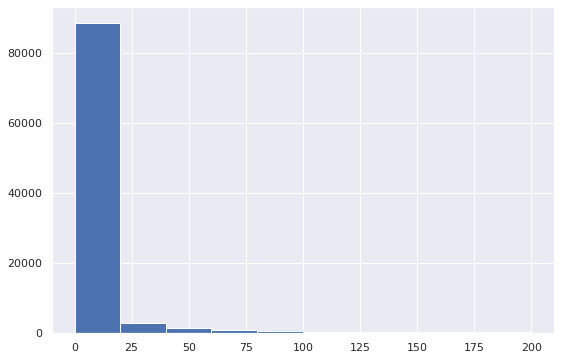

In [25]:
gap_data[gap_data < 200].hist()

In [26]:
gap_data.quantile(0.90)

18.325995370370403

### Найдем id создателя курса

In [27]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [28]:
users_scores.sort_values('correct', ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


### id создателя курса 1046, потому что он владеет правильными ответами

### А теперь посмотрим какие пользователи не решали задания на протяжении 30-ти и более дней

In [29]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [30]:
users_data = events_data.groupby('user_id', as_index = False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [31]:
drop_out_threshold = 30*24*60*60
now = 1526772811

In [32]:
users_data['is_gone_users'] = (now - users_data.last_timestamp) > drop_out_threshold
users_data.head()

,user_id,last_timestamp,is_gone_users
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [33]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [34]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_users,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [35]:
users_data = users_data.fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone_users,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [36]:
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id', 
                        aggfunc='count',
                        fill_value=0).reset_index()

In [37]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [38]:
users_data = users_data.merge(users_events_data, how='outer')

In [39]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [40]:
users_data = users_data.merge(users_days, how='outer')

In [41]:
users_data.head()

,user_id,last_timestamp,is_gone_users,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [42]:
users_data.user_id.nunique()

19234

In [43]:
events_data.user_id.nunique()

19234

In [44]:
users_data['passed_cores'] = users_data.passed > 170

In [45]:
users_data.groupby('passed_cores').count()

,user_id,last_timestamp,is_gone_users,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_cores,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [46]:
1425 / 17809

0.08001572238755686